**IMPORTS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
import warnings

warnings.filterwarnings('ignore')

## LOADING AND PREPROCESSING DATASET




In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Dataset/sqli.csv",encoding='utf-16')
df1.head()

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1


In [ ]:
X1 = df1['Sentence']
y1 = df1['Label']

vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X1 = vectorizer.fit_transform(X1.values.astype('U')).toarray()

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

# Model exploration and Experimentation

In [ ]:
model_ = ["logistic regression","random forest","SVM","Naive Bayes","CNN"]
df1_acc = []

**LOGISTIC REGRESSION**

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X1_train, y1_train)
y_pred = lr_clf.predict(X1_test)
print(f"Accuracy of Logistic Regression on test set : {accuracy_score(y_pred, y1_test)}")
print(f"F1 Score of Logistic Regression on test set : {f1_score(y_pred, y1_test)}")
df1_acc.append(recall_score(y1_test, y_pred))

Accuracy of Logistic Regression on test set : 0.9202380952380952
F1 Score of Logistic Regression on test set : 0.8361858190709047


**RANDOM FOREST**

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X1_train, y1_train)
y_pred = rf_clf.predict(X1_test)
print(f"Accuracy of Random Forest on test set : {accuracy_score(y_pred, y1_test)}")
print(f"F1 Score of Random Forest on test set : {f1_score(y_pred, y1_test)}")
df1_acc.append(recall_score(y1_test, y_pred))

Accuracy of Random Forest on test set : 0.9011904761904762
F1 Score of Random Forest on test set : 0.8504504504504504


**SUPPORT VECTOR MACHINES**

In [ ]:
svm_clf = SVC(gamma = 'auto')
svm_clf.fit(X1_train, y1_train)
y_pred = svm_clf.predict(X1_test)
print(f"Accuracy of SVM on test set : {accuracy_score(y_pred, y1_test)}")
print(f"F1 Score of SVM on test set : {f1_score(y_pred, y1_test)}")
df1_acc.append(recall_score(y1_test, y_pred))

Accuracy of SVM on test set : 0.7702380952380953
F1 Score of SVM on test set : 0.3131672597864769


**NAIVE BAYES**

In [ ]:
nb_clf = GaussianNB()
nb_clf.fit(X1_train, y1_train)
y_pred = nb_clf.predict(X1_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y1_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y1_test)}")
df1_acc.append(recall_score(y1_test, y_pred))

Accuracy of Naive Bayes on test set : 0.9738095238095238
F1 Score of Naive Bayes on test set : 0.9551020408163267


**CONVOLUTIONAL NEURAL NETWORK**

In [ ]:
model = models.Sequential()
model.add(layers.Conv1D(32, 1, activation = 'relu', input_shape = (1,4717)))
model.add(layers.Conv1D(32, 1, activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

X_train = X1_train.reshape(-1, 1, 4717)
X_test = X1_test.reshape(-1, 1, 4717)

model.fit(X_train, y1_train, epochs = 10, validation_data = (X_test, y1_test))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 32)             150976    
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 32)             1056      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 152,065
Trainable params: 152,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
105/105 [==============================] - 2s 9ms/step - loss: 0.4172 - accuracy: 0.8036 - val_loss: 0.2296 - val_accuracy: 0.8845
Epoch 2/10
105/105 [====================

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
print(f"Accuracy of CNN on test set : {accuracy_score(y_pred, y1_test)}")
print(f"F1 Score of CNN on test set : {f1_score(y_pred, y1_test)}")
df1_acc.append(recall_score(y1_test, y_pred))

Accuracy of CNN on test set : 0.9702380952380952
F1 Score of CNN on test set : 0.9492900608519271


In [ ]:
print("The best model for the first dataset is",model_[-1::-1][np.argmax(df1_acc[-1::-1])])
print(df1_acc)

The best model for the first dataset is random forest
[0.7215189873417721, 0.9957805907172996, 0.18565400843881857, 0.9873417721518988, 0.9873417721518988]


Text(0, 0.5, 'Recall Score of the Models')

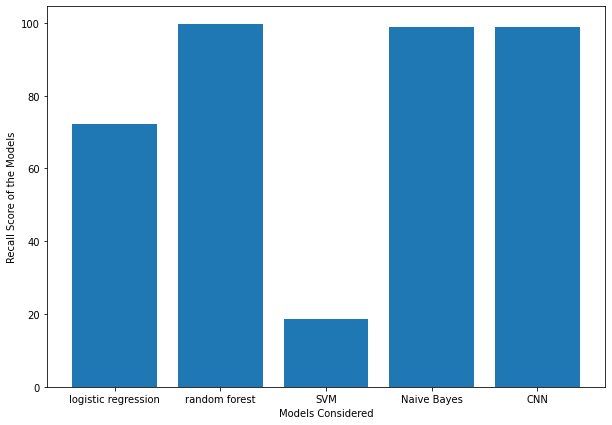

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,7])
plt.bar(model_,np.array(df1_acc)*100)
plt.xlabel("Models Considered")
plt.ylabel("Recall Score of the Models")